In [ ]:
#訓練データと正解データの加工
import numpy as np
from keras.datasets import mnist
(x_trains,y_trains),(x_tests,y_tests)=mnist.load_data()
#トレーニング用の文字60000字のRGB情報(x_trains)と正解の数字(y_trains)
#学習したニューラルネットワークでテストする用の文字10000字のRGB情報(x_tests)と正解の数字(y_tests)を読み込む

#60000*28*28の2次元配列を60000*784の行列に変換(x_trainには60000字それぞれの28*28のRGB値が入っている)
x_trains=x_trains.reshape(60000,784)
#データを255(RGB値の最大値)で割って0.99をかけた後、0.01を加えてシフトする(0.01から1.00の範囲に変換する)
x_trains=(x_trains/255.0*0.99)+0.01
print(x_trains[0])#1文字分のRGB値情報
print(y_trains)#x_trainのRGB値が示す数字（正解）

11493376/11490434 [==============================] - 0s 0us/step
[0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01    

In [ ]:
#目標値の配列を生成
import numpy as np
#出力層のニューロンの数
output_neurons=10
#出力層のニューロン数に合わせて0.01で初期化した配列を作成
targets=np.zeros(output_neurons)+0.01
#正解ラベル(3)に対応する4番目の要素を0.99にする
targets[4]=0.99
print(targets)

[0.01 0.01 0.01 0.01 0.99 0.01 0.01 0.01 0.01 0.01]


In [ ]:
#ニューラルネットワークをインスタンス化して学習を行う
import numpy as np
import time

class neuralNetwork:
    #ニューラルネットワークの初期化
    def __init__(self,
                input_neurons,
                hidden_neurons,
                output_neurons,
                learning_rate):
        self.inneurons=input_neurons
        self.hneurons=hidden_neurons
        self.oneurons=output_neurons
        self.lr=learning_rate
        #weight_initializeを呼ぶ
        self.weight_initialize()
        
    #重みの初期化
    def weight_initialize(self):
        #入力層と隠れ層の間のリンクの重みの初期値を設定
        #np.random.normal(平均,標準偏差,(行数，列数))
        self.w_h=np.random.normal(0.0,#平均値
                                 pow(self.inneurons,-0.5),#標準偏差,入力ニューロン数の-0.5乗
                                  #リンクしているニューロンが多いほど偏差を小さくする
                                  #リンクしているニューロンが多いほどシグモイド関数で1に近い(傾きが0に近い)
                                  #値が発生しやすいため、学習の飽和が起こりやすくなる
                                 (self.hneurons,#隠れ層のニューロン数を行数
                                  self.inneurons+1)#入力層のニューロン数にバイアスを加え、列数とする
                                 )
        #隠れ層と出力層の間のリンクの重みの初期値を設定
        self.w_o=np.random.normal(0.0,
                                 pow(self.hneurons,-0.5),
                                  (self.oneurons,
                                   self.hneurons+1)
                                 )
        
    #活性化関数
    def activation_function(self,x):
        return 1/(1+np.exp(-x))#シグモイド関数
    
    #ニューラルネットワークの学習を行うメソッド
    def train(self,
             inputs_list,
             targets_list
             ):
        #入力値の配列にバイアス項を追加して１列の行列に変換
        inputs=np.array(np.append(inputs_list,[1]),#配列(行)の末尾にバイアスの値１を追加
                       ndmin=2#2次元化
                       ).T#転置して1列の行列にする⇛列の末尾にバイアスの1が入っている
        
        targets=np.array(targets_list,
                        ndmin=2,
                        ).T
        
        #隠れ層への入力信号Ah(1列)を計算　Ah=Wh*X+B
        hidden_inputs=np.dot(self.w_h,#Wh(バイアスの重みを含む)
                             inputs#X(バイアス1を含む)
                            )
        #隠れ層への入力信号Ah(1列)に活性化関数を適用して隠れ層から出力Z(1列)を求める Z=activation(A)
        hidden_outputs=self.activation_function(hidden_inputs)
        #隠れ層の出力行列Z(1列)の末尾にバイアスの値として１を追加
        hidden_outputs=np.append(hidden_outputs,
                                [[1]],#2次元形式でバイアス値を追加
                                axis=0#行を指定（列の場合は１）
                                )
        #出力層への入力信号Aoを計算 Ao=Wo*Z+B
        final_inputs=np.dot(self.w_o,#X(バイアス1を含む)
                           hidden_outputs#W(バイアスの重みを含む)
                           )
        #出力層への入力信号Aoに活性化関数を適用して出力層から出力する O=activation(Ao)
        final_outputs=self.activation_function(final_inputs)
        #目標値と出力層の出力信号の誤差Eoを求める Eo=T-O
        output_errors=targets-final_outputs
        #誤差逆伝搬により隠れ層の誤差Ehを求める Eh=(Woの転置)*Eo
        hidden_errors=np.dot(self.w_o.T,
                            output_errors
                            )
        #隠れ層と出力層の間の重みの更新(シグモイド関数を活性化関数に使う場合) ⊿W=η*Eh*O*(1-O)*(Zの転置)
        self.w_o+=self.lr*np.dot(
            (output_errors*final_outputs*(1.0-final_outputs)),
             np.transpose(hidden_outputs)
        )
        
        #隠れ層の出力エラーからバイアスのエラーを取り除く
        hidden_errors_nobias=np.delete(
            hidden_errors,
            self.hneurons,#バイアスを除くニューロン数をインデックスにする
            axis=0#行の削除を指定
        )
        
        #隠れ層の出力からバイアスを取り除く
        hidden_outputs_nobias=np.delete(
            hidden_outputs,
            self.hneurons,
            axis=0
        )
        
        #入力層と隠れ層の間の重みを更新　勾配法の更新式：Wkj:=Wkj-η*∂E/∂Wkj
        #誤差関数の微分（勾配）に学習率をかけたものを重みから引く
        self.w_h+=self.lr*np.dot(
            hidden_errors_nobias*hidden_outputs_nobias*(1.0-hidden_outputs_nobias),
            np.transpose(inputs))
    
    #学習結果(学習した重み)を元にテストデータを評価するメソッド
    def evaluate(self,
                inputs_list
                ):
        #テスト用データの配列を１列の行列にする
        inputs=np.array(
            np.append(inputs_list,[1]),
                      ndmin=2
                     ).T
        #隠れ層への入力信号を計算
        hidden_inputs=np.dot(self.w_h,
                             inputs
                            )
        #活性化関数を適用して隠れ層から出力する
        hidden_outputs=self.activation_function(hidden_inputs)
        #出力層への入力信号を計算
        final_inputs=np.dot(self.w_o,
                            np.append(hidden_outputs,[1])
                           )
        #活性化関数を適用して出力層から出力する
        final_outputs=self.activation_function(final_inputs)
        return final_outputs

from keras.datasets import mnist
(x_trains,y_trains),(x_tests,y_tests)=mnist.load_data()

#60000*28*28の2次元配列を60000*784の行列に変換
x_trains=x_trains.reshape(60000,784)
#データを255で割って0.99をかけた後、0.01を加えてシフトする
#(0.01から1.00の範囲に変換する※シグモイド関数が0より大きく1より小さい値しか取らないため)
x_trains=(x_trains/255.0*0.99)+0.01

#学習を行って結果を出力
start=time.time()#プログラムの開始時刻を取得
input_neurons=784
hidden_neurons=200
output_neurons=10
learning_rate=0.1

#neuralNetworkオブジェクトの生成
n=neuralNetwork(input_neurons,
               hidden_neurons,
               output_neurons,
               learning_rate)
#学習を繰り返す回数
epochs=3

#指定した回数だけ学習を繰り返す
for e in range(epochs):
    #画像データと正解ラベルを順番にとりだしてネットワークに入力
    for (inputs,target) in zip(x_trains,y_trains):
        #出力層のニューロン数に合わせて目標配列を作成 [0.01,...,0.01](※(出力層のニューロン数)個の要素)
        targets=np.zeros(output_neurons)+0.01
        #正解値に対応する要素を0.99にする
        targets[int(target)]=0.99
        #学習を実行
        n.train(inputs,
               targets
               )
        
print("done")#処理が終了したら"done"と出力
#処理にかかった時間を出力
print("Computation time:{0:.3f} sec".format(time.time()-start))

done
Computation time:169.653 sec


7


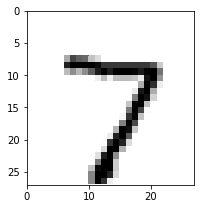

In [ ]:
#ニューラルネットワークの学習結果をテストする
print(y_tests[0])

import matplotlib.pyplot as plt
plt.figure(1,figsize=(12,3.2))
plt.subplots_adjust(wspace=0.5)
plt.gray()
plt.subplot(1,3,1)
img=x_tests[0,:,:].reshape(28,28)
#色相を反転させてプロットする
plt.pcolor(255-img)
plt.xlim(0,27)
plt.ylim(27,0)
plt.show()

In [ ]:
#ニューラルネットワークのテスト
x_tests=x_tests.reshape(10000,784)
x_tests=(x_tests/255.0*0.99)+0.01
#print(x_tests[0])

score=[]

for (inputs,
    correct_label) in zip(x_tests,
                          y_tests):
    outputs=n.evaluate(inputs)
    #print(outputs)
    targets=np.zeros(output_neurons)+0.01
    targets[int(correct_label)]=0.99
    #print(targets)
    label=np.argmax(outputs)#argmax:配列の中で最大の値のインデックスを返す
    if (label==correct_label):
        score.append(1)
    else:
        score.append(0)
        
score_array=np.array(score)
print("performance=",score_array.sum()/score_array.size)
        
result=["□" if i==1 else "■" for i in score]#配列の中の要素が1だったら□に、0だったら■に置き換える
print(result)

performance= 0.9726
['□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '■', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '■', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '■', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□',